# Your name: <Enter your name>
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [112]:
# import packages 
import pandas as pd


# Data File Reading Section
## Write code to read in data from external sources here

In [113]:
#read datasets
data = pd.read_csv('data.csv', encoding = "ISO-8859-1")

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [114]:
# Your code for this section here ...

#getting initial understanding of the data

data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [115]:
#understanding data further...

data.shape


(435742, 13)

In [116]:
data.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [117]:
#understnading amount of null values in each column

data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [118]:
#further data type info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [119]:
#top picture of data

data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [120]:
# Cleaning up the data

#dropping columns that aren't required

data = data.drop(columns=['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'])


# dropping rows where no date is available

data = data.dropna(subset=['date'])

In [121]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [122]:
# displaying final columns (data.columns)

list(data.columns)

['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5', 'date']

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [123]:
# ... Your code here
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", "np.nan": "RRO" }

data.type = data.type.replace(types)

In [124]:
# Display top 10 records after codification of 'types'
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [125]:
# this creates a new year column based on the year in the "date" column

data['year'] = pd.DatetimeIndex(data['date']).year

In [126]:
#proof that it worked 

data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [129]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy

import numpy as np


from sklearn.impute import SimpleImputer

# Missing values is represented using NaN and hence specified. If it 

# is empty field, missing values will be specified as ''

#here we created a list called COLS with the names of the columns that we want

COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

#now we invoke simple imputer to fill in those NaaN values with the mean of each column


imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
data[COLS] = imputer.fit_transform(data[COLS])




In [130]:
# Display data.info after the transformation
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
state       435735 non-null object
location    435735 non-null object
type        430345 non-null object
so2         435735 non-null float64
no2         435735 non-null float64
rspm        435735 non-null float64
spm         435735 non-null float64
pm2_5       435735 non-null float64
date        435735 non-null object
year        435735 non-null int64
dtypes: float64(5), int64(1), object(4)
memory usage: 36.6+ MB


In [131]:
# Display that there are no more missing values in the dataset
data.isnull().sum()

state          0
location       0
type        5390
so2            0
no2            0
rspm           0
spm            0
pm2_5          0
date           0
year           0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

In [ ]:
#Below, I created 4 different graphs for each type of chemical 
#This shows the amount of content for each particulat based on the state

### so2 status

In [74]:
so2 = data.groupby(['state']).so2.median()
so2 = pd.DataFrame(so2)
so2 = so2.sort_values(by = 'so2', ascending=True)

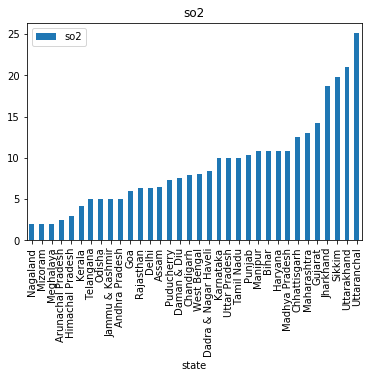

In [75]:
import matplotlib.pyplot as plot

so2.plot.bar(rot=90, title="so2");

#the state that has the highest so2 content is Ultaranchal. 
#Not only that, but there seems to be a large difference between them and the state 
#behind them, Ultarakhand. 

### no2 status

In [76]:
no2 = data.groupby(['state']).no2.median()
no2 = pd.DataFrame(no2)
no2 = no2.sort_values(by = 'no2', ascending=True)

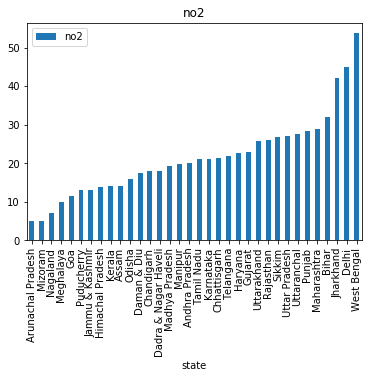

In [77]:
no2.plot.bar(rot=90, title="no2");

#The state with the highes no2 content is West Bengal and 
#the state with the least is Arunachal Pradesh.

### rspm status

In [78]:
rspm = data.groupby(['state']).rspm.median()
rspm= pd.DataFrame(rspm)
rspm = rspm.sort_values(by = 'rspm', ascending=True)

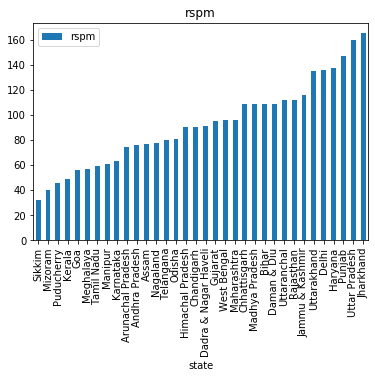

In [79]:
rspm.plot.bar(rot=90, title="rspm");

#The state with the lowest rspm content is Sikkim and the state with the highest is Jharkhand.

### spm status

In [80]:
spm = data.groupby(['state']).spm.median()
spm = pd.DataFrame(spm)
spm = spm.sort_values(by = 'spm', ascending=True)

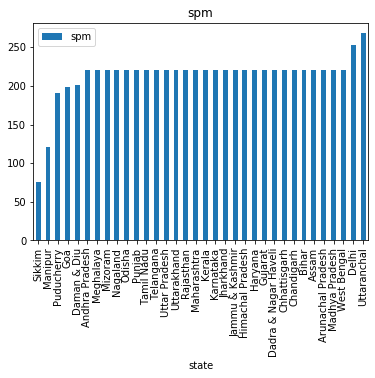

In [143]:
spm.plot.bar(rot=90, title="spm");

#The state with the lowest rspm content is Sikkim, similar to rspm
#and the state with the highest spm content is Ultarachanal

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [105]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,108.833091,220.78348,40.791467,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,108.833091,220.78348,40.791467,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,108.833091,220.78348,40.791467,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01,1990


In [ ]:
#Below I made a new dataset with just the Andhra Pradesh values.
#I then grouped them by the median values for year and finally created the graphs comparing the two 
#types of particulat that it said we should compare. 

In [101]:
new = data[data.state == 'Andhra Pradesh'] 
new.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,108.833091,220.78348,40.791467,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,108.833091,220.78348,40.791467,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,108.833091,220.78348,40.791467,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01,1990


In [104]:
new1 = new.groupby(by=["year"]).median()
new1.head()

,so2,no2,rspm,spm,pm2_5
year,,,,,
1990,5.60,13.6,108.833091,179.00000,40.791467
1991,8.25,12.8,108.833091,141.50000,40.791467
1992,12.40,27.6,108.833091,192.00000,40.791467
1993,6.00,11.4,108.833091,220.78348,40.791467
1994,8.70,14.2,108.833091,220.78348,40.791467


In [110]:
df = new1.iloc[:, 0:4]
df.head()

,so2,no2,rspm,spm
year,,,,
1990,5.60,13.6,108.833091,179.00000
1991,8.25,12.8,108.833091,141.50000
1992,12.40,27.6,108.833091,192.00000
1993,6.00,11.4,108.833091,220.78348
1994,8.70,14.2,108.833091,220.78348


In [142]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.
new_so2 = df.iloc[:, 0:2]


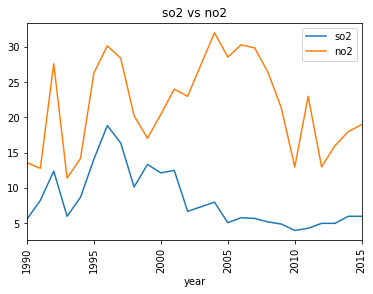

In [145]:
#so2 and no2
new_so2.plot.line(rot=90, title="so2 vs no2");


In [140]:
#rspm and spm

new_rspm = df.iloc[:, 2:4]


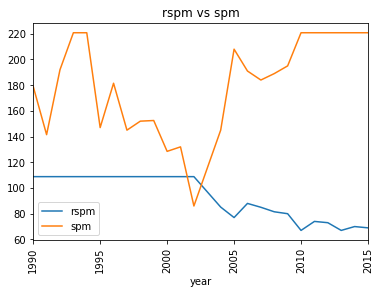

In [144]:
new_rspm.plot.line(rot=90, title="rspm vs spm");

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



In [ ]:
#in Andhra Pradesh, the no2 has gone through spikes overtime and is currently down 
#from what it was in the early 2000s yet it is still decently higher than it was in the early 1990s.
#As for so2, it has seen a nice drop off since the mid 1990s and has stayed relatively low and even since then.

#The spm in Andhra Pradesh took a dip in the early 2000s yet has increased to higher than ever in recent years. 
#However, the rspm has seemed to decrease in recent years since 2002. 

#The most alarming thing in this dataset in Andhra Pradesh is the massive rise in spm in recent years. 